In [2]:
import pickle
import json
import numpy as np
from sklearn.manifold import TSNE
from math import exp
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import seaborn as sns
# sns.set_context("paper")
sns.set_context('talk')
sns.set()
%matplotlib inline

In [3]:
# Constants
itow = json.load(open('../data/coco/cocotalk.json', 'r'))['ix_to_word']
WORDS = {int(k): v for k, v in itow.items()}
if 0 not in WORDS:
    WORDS[0] = 'EOS'
MATCH = {v: k for k,v in WORDS.items()}
del itow

In [4]:
# utils:
def normalize(A):
    l1 = A.sum(axis=1)
    A /= l1.reshape(len(A), 1)
    return A

def invocab(ngram):
    for w in ngram:
        if w not in MATCH:
            return False
    return True

def space(xy, points, delta=1):
    x , y = xy
    xs = np.array([p[0] for p in points])
    ys = np.array([p[1] for p in points])
    while np.any(np.absolute(xs -x) < delta):
        x += delta
    while np.any(np.absolute(ys -y) < delta):
        y += delta
    return [x, y]

In [5]:
# Load frequencies:
df = pickle.load(open('../data/coco-train-tok-df.p', 'rb'))['freq']
# Separate according to gram length
dfng = {1: {}, 2: {}, 3:{}, 4:{}}
for k in df:
    if invocab(k):
        dfng[len(k)][k] = df[k]
# pickle.dump(dfng, open('../data/coco-train-tok-ng-df.p', 'wb'))
del df
# words occurences:
DFW = {k[0]:v for k,v in dfng[1].items()}
if 'EOS' not in DFW:
    DFW['EOS'] = 1000
if 'UNK' not in DFW:
    DFW['UNK'] = 1000
del dfng

# build Matrix of f(w_i) / f(w_j)
F = np.ones(len(WORDS))
for w, ix in MATCH.items():
    F[ix] = DFW[w]
# F = F.reshape(-1, 1)
# fF = np.dot(1/F, np.transpose(F))
# pickle.dump(FF, open('../data/freq_ratio_ij.pkl', 'wb'))
# sns.kdeplot(1/F[:,0])

F = F.reshape(1, -1)
print(F.shape)
FF = np.repeat(1/F, len(F), axis=0)
print(FF.shape)
FF[0]
# pickle.dump(FF, open('../data/coco/idf_coco.pkl', 'wb'))

(1, 9488)
(1, 9488)


array([ 0.001     ,  0.00122249,  0.00039417, ...,  0.01851852,
        0.05882353,  0.001     ])

In [6]:
# F /= np.sum(F)
pickle.dump(F, open('cooc_freq_unnorm.pkl', 'wb'))

In [ ]:
FF = pickle.load(open('../data/coco/idf_coco.pkl', 'rb'))

In [ ]:
sns.kdeplot(FF.flatten())

In [5]:
def plot_word_neighbors(ax, selected, sim, G2, prefix, NN=15, verbose=0, sens=1):
    sns.set()
    colors = sns.color_palette("Paired", NN)
    k = MATCH[selected]
    e = 0
    coords = []
    nbrs = sim[k].argsort()[-NN:][::-1]
    R = max([sim[k, i] for i in nbrs])/3
    for i in nbrs:
        xy = G2[i]
        xy = space(xy, coords, delta=sens)
        coords.append(xy)
        ax.plot(xy[0], xy[1], '.', alpha=0)
        ax.add_artist(Circle(xy,
                             radius=sim[k,i]/R,
                             color=colors[e], alpha=0.3))
        ax.text(xy[0], xy[1], WORDS[i], fontsize=10)  # weight='bold'
        e += 1

        ax.set_title("%s: %s\'s top %d neighbors" % (prefix, WORDS[k], NN), fontsize=12)
        ax.axis('equal')
        plt.tight_layout()
#         plt.savefig('../figures/%s_nbrs_%s.png' % (prefix, WORDS[k]),
#                     dpi=300, bbox_inches='tight')


In [12]:
def plot_distrib(ax, rs, title, ks=None, ascend=False):
    if not ks:
        ks = np.random.randint(9400, size=(5,))
    rs = normalize(rs)
    for k in ks:
        if ascend:
            ax.plot(sorted(rs[k]), label=WORDS[k])
        else:
            ax.plot(rs[k], label=WORDS[k])
    ax.legend()
    ax.set_title(title)

In [7]:
# project Glove embedding to 2D
# G = pickle.load(open('../data/Glove/glove_wiki_d300_w15_matrix.pkl', 'rb'), encoding='iso-8859-1')
# G2 = TSNE(n_components=2, verbose=2).fit_transform(G)
# pickle.dump(G2, open('../data/Glove/Glove_tsne.pkl', 'wb'))
G2 = pickle.load(open('../data/Glove/glove_wiki_d300_w15_matrix_tsne2D.pkl', 'rb'))

# GCoco = pickle.load(open('../data/Glove/glove_matrix_train_coco.pkl', 'rb'))
# GCoco2 = TSNE(n_components=2, verbose=2).fit_transform(GCoco)
# pickle.dump(GCoco2, open('../data/Glove/Glove_train_coco_tsne.pkl', 'wb'))
GCoco2_d300_w15 = pickle.load(open('../data/Glove/glove_coco_d300_w15_matrix_tsne2D.pkl', 'rb'))

# GCoco = pickle.load(open('../data/Glove/glove_coco_d512_w15_matrix.pkl', 'rb'))
# GCoco2_d512 = TSNE(n_components=2, verbose=2).fit_transform(GCoco)
# pickle.dump(GCoco2_d512, open('../data/Glove/glove_coco_d512_w15_matrix_tsne2D.pkl', 'wb'))
GCoco2_d512_w15 = pickle.load(open('../data/Glove/glove_coco_d512_w15_matrix_tsne2D.pkl', 'rb'))

# GCoco = pickle.load(open('../data/Glove/glove_coco_d512_w10_matrix.pkl', 'rb'))
# GCoco2_d512_w10 = TSNE(n_components=2, verbose=2).fit_transform(GCoco)
# pickle.dump(GCoco2_d512_w10, open('../data/Glove/glove_coco_d512_w10_matrix_tsne2D.pkl', 'wb'))
GCoco2_d512_w10 = pickle.load(open('../data/Glove/glove_coco_d512_w10_matrix_tsne2D.pkl', 'rb'))

In [8]:
# Load sim matrix
sim_wiki = pickle.load(open('../data/Glove/glove_wiki_d300_w15_similarities.pkl',
                             'rb'), encoding='iso-8859-1')
# Load CocoGlove sim matrix
sim_coco_d300_w15 = pickle.load(open('../data/Glove/glove_coco_d300_w15_similarities.pkl','rb'))
sim_coco_d512_w15 = pickle.load(open('../data/Glove/glove_coco_d512_w15_similarities.pkl','rb'))
sim_coco_d512_w10 = pickle.load(open('../data/Glove/glove_coco_d512_w10_similarities.pkl','rb'))

In [9]:
def exps(sim, tau=0.2, freq=False):
    if freq:
        return normalize(np.exp((sim-1 + tau * FF)/tau))
    else:
        return normalize(np.exp((sim-1)/tau))

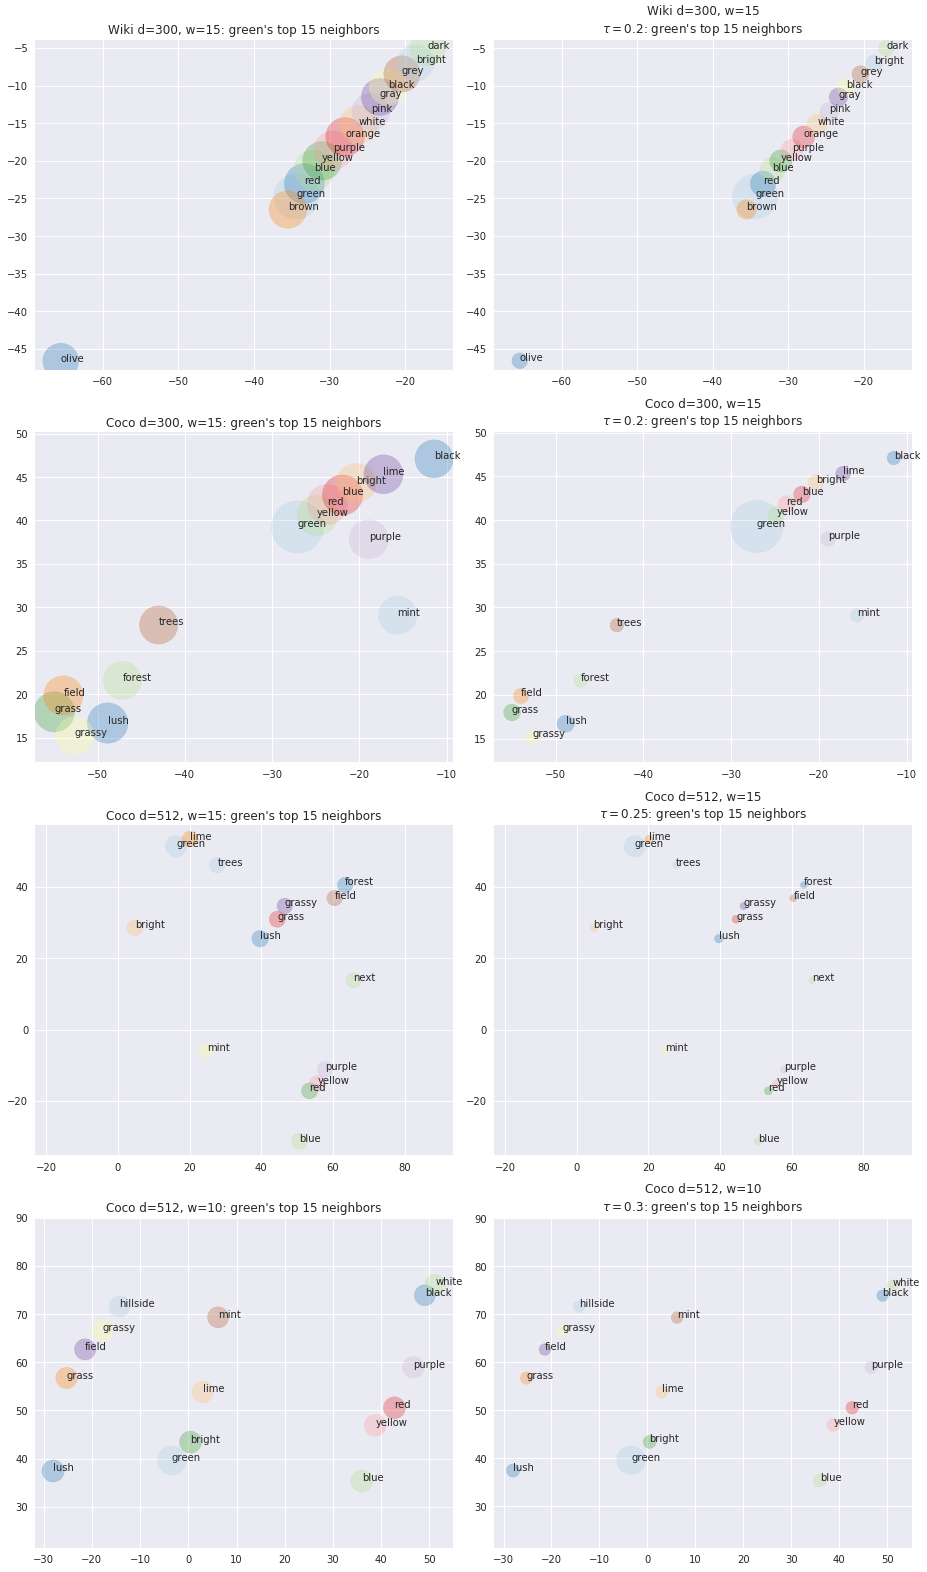

In [10]:
# Run
sns.set()
fig, axs = plt.subplots(4, 2, figsize=(13, 22))
plot_word_neighbors(axs[0,0], 'green', sim_wiki, G2,
                    "Wiki d=300, w=15")
plot_word_neighbors(axs[0,1], 'green', exps(sim_wiki, 0.2), G2,
                    "Wiki d=300, w=15\n$\\tau=0.2$")
plot_word_neighbors(axs[1,0], 'green', sim_coco_d300_w15, GCoco2_d300_w15,
                    "Coco d=300, w=15")
plot_word_neighbors(axs[1,1], 'green', exps(sim_coco_d300_w15, 0.2), GCoco2_d300_w15,
                    "Coco d=300, w=15\n$\\tau=0.2$")
plot_word_neighbors(axs[2,0], 'green', sim_coco_d512_w15, GCoco2_d512_w15,
                    "Coco d=512, w=15", sens=2)
plot_word_neighbors(axs[2,1], 'green', exps(sim_coco_d512_w15, 0.25), GCoco2_d512_w15,
                    "Coco d=512, w=15\n$\\tau=0.25$", sens=2)
plot_word_neighbors(axs[3,0], 'green', sim_coco_d512_w10, GCoco2_d512_w10,
                    "Coco d=512, w=10", sens=2)
plot_word_neighbors(axs[3,1], 'green', exps(sim_coco_d512_w10, 0.3), GCoco2_d512_w10,
                    "Coco d=512, w=10\n$\\tau=0.3$", sens=2)

In [ ]:
sim_freq_exp_coco = normalize(np.exp((sim_clean_coco-1)/0.15) * np.exp(FF))
plot_word_neighbors(['green'], sim_freq_exp_coco, GCoco2, "coco_freq_t02")

In [ ]:
plt.figure(figsize=(15, 2))
sns.heatmap(FF[:1,:])
plt.figure(figsize=(10, 10))
sns.heatmap(exps(sim_coco_d512_w15, 0.25)[:300, :300])
plt.figure(figsize=(10, 10))
sns.heatmap(sim_coco_d512_w15[:300, :300])


In [ ]:
sns.set()
f, axs = plt.subplots(1, 4, figsize=(10 , 3), sharey=True)
axs[0].boxplot(sim_coco_d512_w15.flatten())
axs[0].set_title('Coco, d=512, w=15')

axs[1].boxplot(sim_coco_d512_w10.flatten())
axs[1].set_title('Coco, d=512, w=10')

axs[2].boxplot(sim_coco_d300_w15.flatten())
axs[2].set_title('Coco, d=300, w=15')

axs[3].boxplot(sim_wiki.flatten())
axs[3].set_title('Wiki, d=300, w=15')


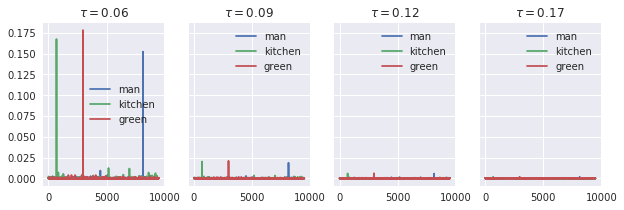

In [17]:
f, axs = plt.subplots(1, 4, figsize=(10 , 3), sharey=True)
plot_distrib(axs[0], exps(sim_coco_d300_w15, .06), '$\\tau=0.06$', ks=(8128, 689, 2966))
plot_distrib(axs[1], exps(sim_coco_d300_w15, 0.09), '$\\tau=0.09$', ks=(8128, 689, 2966))
plot_distrib(axs[2], exps(sim_coco_d300_w15, 0.12), '$\\tau=0.12$', ks=(8128, 689, 2966))
plot_distrib(axs[3], exps(sim_coco_d300_w15, 0.17), '$\\tau=0.17$', ks=(8128, 689, 2966))

In [ ]:
np.exp(FF[:100, :100]/100)

In [ ]:
sns.heatmap(np.log(FF))

In [ ]:
sns.heatmap(np.exp(FF/1000))

In [ ]:
print('max:', np.max(FF), 'min:', np.min(FF))

## Bigrams, glove & sim

In [ ]:
# Bi-grams:
# Glove = {}
# with open('../data/Glove/glove_bigrams_coco.txt', 'r') as f:
#     for line in f:
#         code = line.strip().split()
#         word = code[0]
#         print("parsed word:", word)
#         g = np.array(code[1:], dtype="float32")
#         assert g.shape == (300,)
#         Glove[word] = g
# pickle.dump(Glove, open('data/Glove/glove_bigrams_dict.pkl', 'w'))
Glove = pickle.load(open('../data/Glove/bi_glove_coco_d300_w15_dict.pkl', 'rb'))

In [ ]:
Bigrams = Glove.keys()
GB = np.zeros((len(Bigrams), 300), dtype="float32")
for e, k in enumerate(Bigrams):
    GB[e] = Glove[k]
pickle.dump(GB, open('../data/Glove/bi_glove_coco_d300_w15_matrix.pkl', 'wb'))


In [ ]:
GB2 = TSNE(n_components=2, verbose=2).fit_transform(GBclean)
pickle.dump(GB2, open('../data/Glove/bi_glove_coco_d300_w15_matrix_tsne2D.pkl', 'wb'))
# GB2 = pickle.load(open('../data/Glove/bi_glove_coco_d300_w15_matrix_tsne2D.pkl', 'rb'))

In [ ]:
match = lambda v: (MATCH[v.split('_')[0]], MATCH[v.split('_')[1]])
b2toi = {}
GBclean = []
i = 0
for v in list(Bigrams):
    try:
        big = match(v)
        b2toi[i] = big
        i += 1
        GBclean.append(Glove[v])
    except:
        pass
GBclean = np.array(GBclean)
print(GBclean.shape)
pickle.dump({"embeddings": GBclean,
             "keys": b2toi},
            open('../data/Glove/bi_glove_coco_d300_w15_matrix.pkl', 'wb'))

In [ ]:
# G = pickle.load(open('data/Glove/cocotalk_glove_v2.pkl', 'r'))
import scipy
eps = 1e-6
G = GBclean
print("G shape:", G.shape, len(G))
#  G[-1] = np.mean(G)
for i in range(len(G)):
    if not np.sum(G[i] ** 2):
        print('%d) norm(g) = 0' % i)
        G[i] = eps + G[i]
Ds = scipy.spatial.distance.pdist(G, metric='cosine')
Ds = scipy.spatial.distance.squareform(Ds)
As = np.diag(Ds)
print("(scipy) sum:", np.sum(As), "min:", np.min(Ds), np.min(As), "max:", np.max(Ds), np.max(As))
Ds = 1 - Ds / 2# map to [0,1]
print("Shapes:", Ds.shape, np.min(Ds), np.max(Ds), np.diag(Ds))
pickle.dump(np.float32(Ds), open("../data/Glove/bi_glove_coco_d300_w15_similarities.pkl", "wb"))

In [ ]:
plt.figure(figsize=(16, 16))
for e, k in enumerate(list(Bigrams)[:25]):
    plt.plot(GB2[e, 0], GB2[e, 1], 'o')
    plt.text(GB2[e, 0], GB2[e, 1], k)

In [ ]:
MATCH['man'], MATCH['kitchen'], MATCH['green']

In [7]:
CooC = pickle.load(open("../data/coco/coocurrencs10_coco.pkl", 'rb'))
cl_CooC = pickle.load(open("../data/coco/clean_coocurrencs10_coco.pkl", 'rb'))

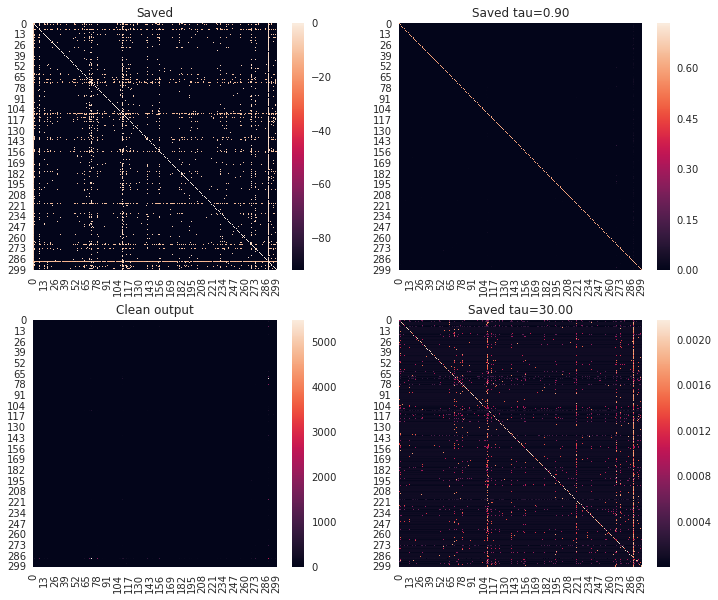

In [17]:
sns.set()
tau = .9
f, axs = plt.subplots(2,2, figsize=(12, 10))
sns.heatmap(CooC[:300, :300], ax=axs[0,0])
axs[0,0].set_title("Saved")
sns.heatmap(exps(CooC, tau)[:300, :300], ax=axs[0,1])
axs[0,1].set_title("Saved tau=%.2f" % tau)
sns.heatmap(cl_CooC[:300, :300], ax=axs[1,0])
axs[1,0].set_title("Clean output")
tau = 30
sns.heatmap(exps(CooC, tau)[:300, :300], ax=axs[1,1])
axs[1,1].set_title("Saved tau=%.2f" % tau)






In [ ]:
exp(-1/.15)

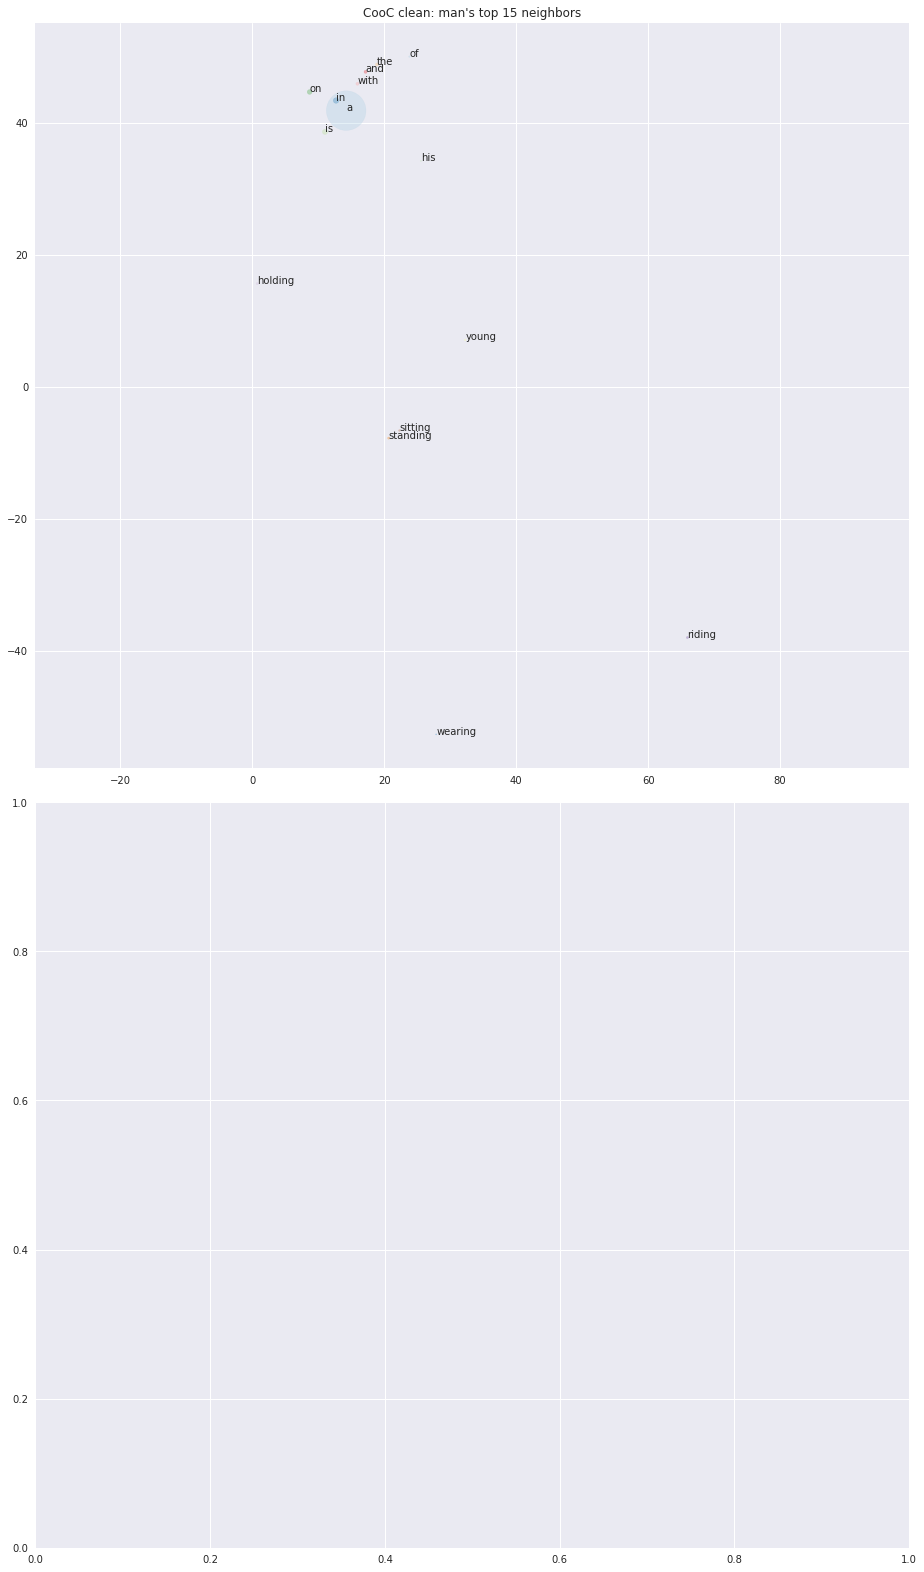

In [28]:
sns.set()
fig, axs = plt.subplots(2,1, figsize=(13, 22))
plot_word_neighbors(axs[0], 'man', cl_CooC, G2,
                    "CooC clean")
# plot_word_neighbors(axs[0], 'green', exps(CooC, .15), G2,
#                     "CooC tau=.15")
# plot_word_neighbors(axs[1], 'green', exps(CooC, .9), G2,
#                     "CooC tau=.9")